# Анализ данных

Основные статистические параметры:
        Объем_потерь_кг
count      1480.000000
mean        675.390541
std        2017.049250
min           0.000000
25%          67.000000
50%         374.000000
75%         708.000000
max       19975.000000

Анализ результатов:
Средний объем потерь: 675.3905405405405
Медианный объем потерь: 374.0
Максимальный объем потерь: 19975.0
Минимальный объем потерь: 0.0
Стандартное отклонение объема потерь: 2017.0492496806569


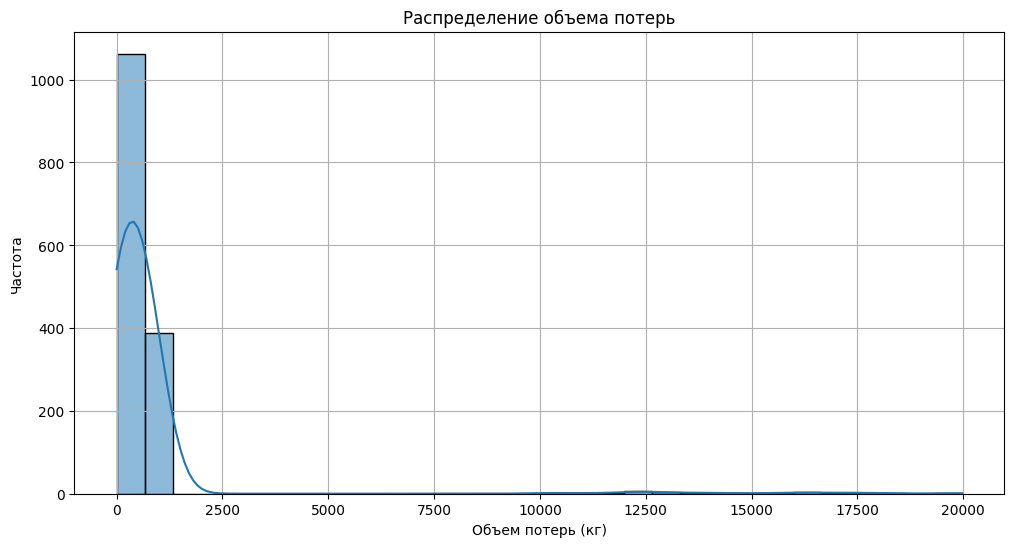

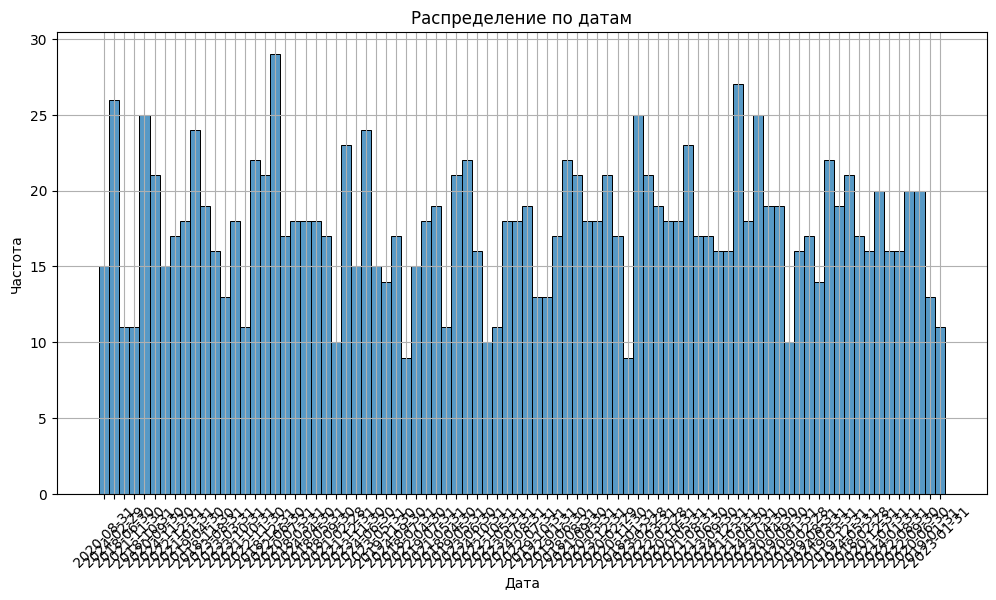

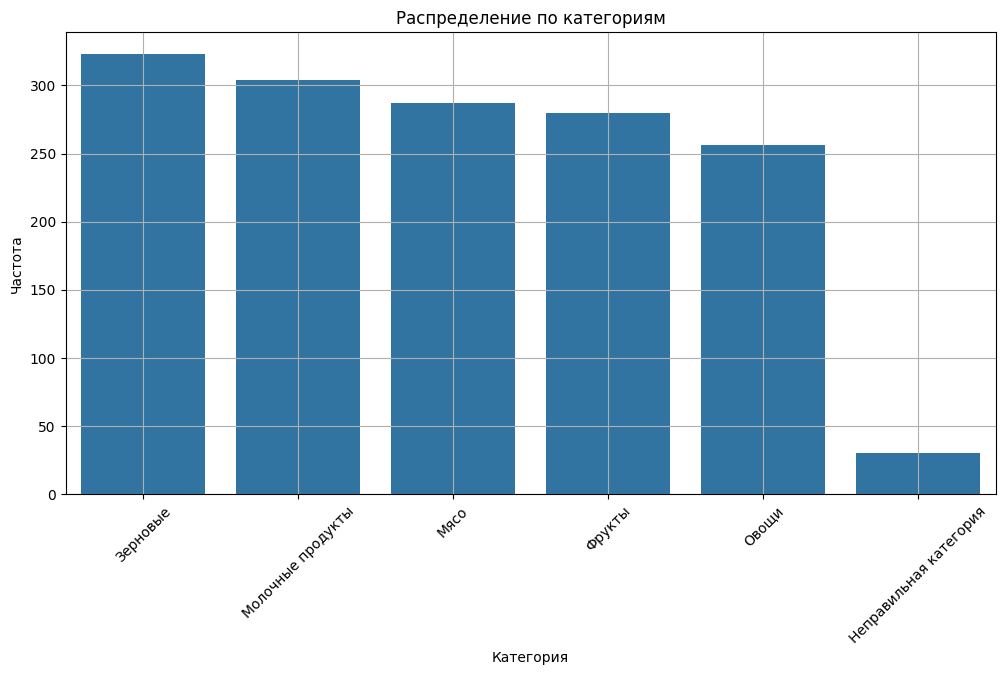

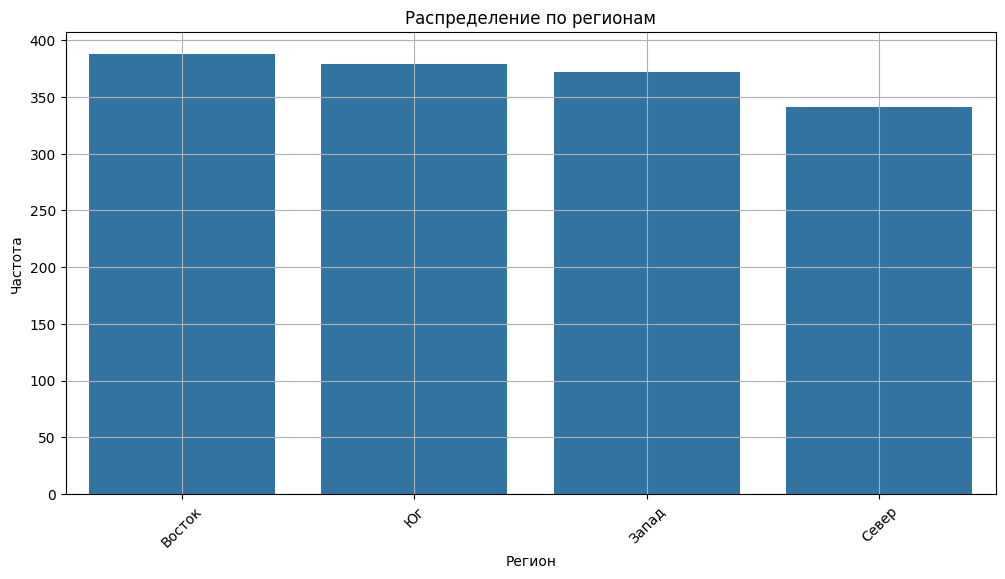

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка очищенного датасета
cleaned_df = pd.read_csv('cleaned_food_waste_data1.csv')

# 1. Расчет основных статистических параметров
# Выбираем интересующие нас характеристики
stats = cleaned_df.describe()

# Вывод статистических параметров
print("Основные статистические параметры:\n", stats)

# 2. Анализ результатов
# Пример анализа
print("\nАнализ результатов:")
print(f"Средний объем потерь: {cleaned_df['Объем_потерь_кг'].mean()}")
print(f"Медианный объем потерь: {cleaned_df['Объем_потерь_кг'].median()}")
print(f"Максимальный объем потерь: {cleaned_df['Объем_потерь_кг'].max()}")
print(f"Минимальный объем потерь: {cleaned_df['Объем_потерь_кг'].min()}")
print(f"Стандартное отклонение объема потерь: {cleaned_df['Объем_потерь_кг'].std()}")

# 3. Построение графиков распределения для всех атрибутов
# График распределения для 'Объем_потерь_кг'
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['Объем_потерь_кг'], bins=30, kde=True)
plt.title('Распределение объема потерь')
plt.xlabel('Объем потерь (кг)')
plt.ylabel('Частота')
plt.grid()
plt.show()

# График распределения для 'Дата'
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['Дата'], bins=30, kde=False)
plt.title('Распределение по датам')
plt.xlabel('Дата')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# График распределения для 'Категория' (если категориальные данные)
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_df, x='Категория', order=cleaned_df['Категория'].value_counts().index)
plt.title('Распределение по категориям')
plt.xlabel('Категория')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# График распределения для 'Регион' (если категориальные данные)
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_df, x='Регион', order=cleaned_df['Регион'].value_counts().index)
plt.title('Распределение по регионам')
plt.xlabel('Регион')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Поиск зависимостей

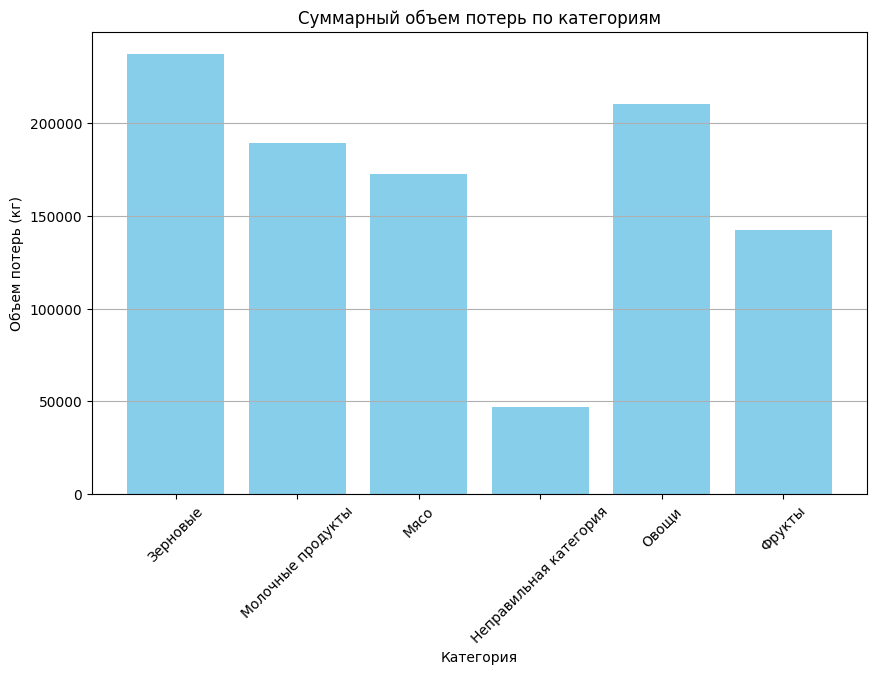

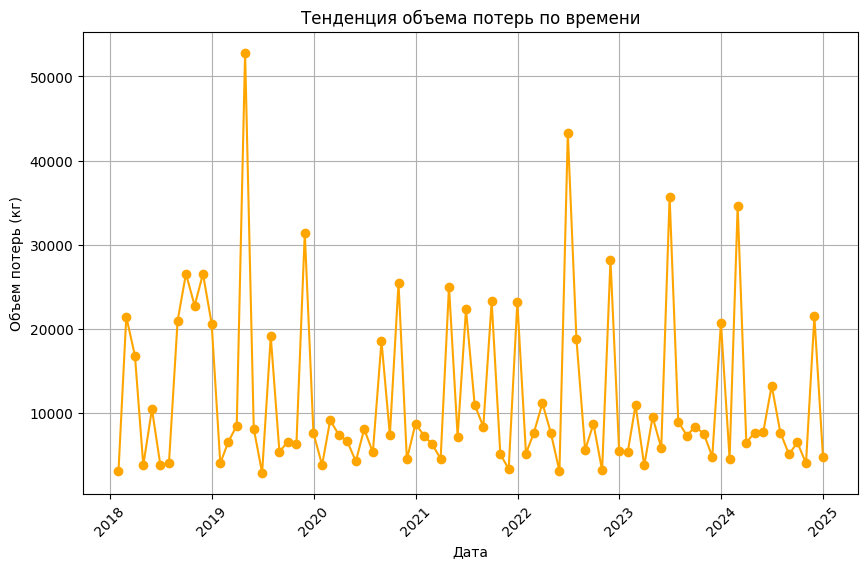

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV
df = pd.read_csv('cleaned_food_waste_data1.csv', parse_dates=['Дата'])

# Анализ зависимостей
# Группировка данных по категории и подсчет суммарного объема потерь
grouped_data = df.groupby('Категория')['Объем_потерь_кг'].sum().reset_index()

# Визуализация зависимостей
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Категория'], grouped_data['Объем_потерь_кг'], color='skyblue')
plt.title('Суммарный объем потерь по категориям')
plt.xlabel('Категория')
plt.ylabel('Объем потерь (кг)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Поиск тенденций
# Группировка данных по дате и подсчет суммарного объема потерь
trend_data = df.groupby('Дата')['Объем_потерь_кг'].sum().reset_index()

# Визуализация тенденций
plt.figure(figsize=(10, 6))
plt.plot(trend_data['Дата'], trend_data['Объем_потерь_кг'], marker='o', linestyle='-', color='orange')
plt.title('Тенденция объема потерь по времени')
plt.xlabel('Дата')
plt.ylabel('Объем потерь (кг)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
import pandas as pd

# Загрузка данных из CSV файла
# Замените 'your_file.csv' на путь к вашему файлу
df = pd.read_csv('cleaned_food_waste_data1.csv', delimiter=',')  # Убедитесь, что разделитель соответствует вашему файлу


# Преобразование даты в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Преобразование объема потерь в числовой формат (если необходимо)
df['Объем_потерь_кг'] = pd.to_numeric(df['Объем_потерь_кг'], errors='coerce')

# Группировка данных по категории и региону, суммирование объемов потерь
grouped_df = df.groupby(['Категория', 'Регион'], as_index=False)['Объем_потерь_кг'].sum()

# Корреляционный анализ
# Вычисляем корреляцию только для числовых столбцов
correlation_matrix = grouped_df[['Объем_потерь_кг']].corr()

# Вывод результатов
print("Группировка данных по категории и региону:")
print(grouped_df)
print("\nКорреляционная матрица:")
print(correlation_matrix)

ValueError: could not convert string to float: 'Зерновые'